In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
labels= pd.read_csv('face_dataset.csv')

In [13]:
labels.head(10)

,image_id,age,gender,ethnicity
0,lhdattxcqr,100,0,0
1,lbhumkpyaq,100,0,0
2,cafqfjecpw,100,1,0
3,wpintedrvx,100,1,0
4,pepixqcuhh,100,1,0
5,mxymeiwjlh,100,1,0
6,avjxzcvogv,100,1,0
7,cdbvuveupn,100,1,0
8,xenqvdjgtt,100,1,2
9,itqhqhlxih,100,1,2


In [14]:
labels = labels[labels.ethnicity != '20170109150557335.jpg.chip.jpg']
labels = labels[labels.ethnicity != '20170116174525125.jpg.chip.jpg']
labels = labels[labels.ethnicity != '20170109142408075.jpg.chip.jpg']

labels = labels.astype({'ethnicity': 'int64'})

In [15]:
labels.describe()

,age,gender,ethnicity
count,23705.000000,23705.000000,23705.000000
mean,33.300907,0.477283,1.269226
std,19.885708,0.499494,1.345638
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,0.000000,1.000000
75%,45.000000,1.000000,2.000000
max,116.000000,1.000000,4.000000


In [16]:
multiLabels = pd.DataFrame(columns=['image_id', 'label'])

In [9]:
labels.values

array([['lhdattxcqr', 100, 0, 0],
       ['lbhumkpyaq', 100, 0, 0],
       ['cafqfjecpw', 100, 1, 0],
       ...,
       ['svoitrvira', 9, 1, 4],
       ['iifoevfnvu', 9, 1, 4],
       ['gwicgubeny', 9, 1, 4]], dtype=object)

In [17]:
def clubGenderEthnicity(gender, ethnicity):
    if gender==0 and ethnicity==0:
        return 0
    elif gender==0 and ethnicity==1:
        return 1
    elif gender==0 and ethnicity==2:
        return 2
    elif gender==0 and ethnicity==3:
        return 3
    elif gender==0 and ethnicity==4:
        return 4
    elif gender==1 and ethnicity==0:
        return 5
    elif gender==1 and ethnicity==1:
        return 6
    elif gender==1 and ethnicity==2:
        return 7
    elif gender==1 and ethnicity==3:
        return 8
    else:
        return 9        

In [18]:
def makeMultiLabels(data):
    datas = data.values
    c = 0
    for data in datas:
        if c%1000==0:
            print("[INFO] {} labels processed".format(c))
        image_id = data[0]
        label = clubGenderEthnicity(data[2], data[3])
        multiLabels.loc[c] = [image_id, label]
        c+=1
    
    print("[INFO] Done")
    multiLabels.to_csv('multiLabels.csv', index=False)

In [20]:
makeMultiLabels(labels)

[INFO] 0 labels processes
[INFO] 1000 labels processes
[INFO] 2000 labels processes
[INFO] 3000 labels processes
[INFO] 4000 labels processes
[INFO] 5000 labels processes
[INFO] 6000 labels processes
[INFO] 7000 labels processes
[INFO] 8000 labels processes
[INFO] 9000 labels processes
[INFO] 10000 labels processes
[INFO] 11000 labels processes
[INFO] 12000 labels processes
[INFO] 13000 labels processes
[INFO] 14000 labels processes
[INFO] 15000 labels processes
[INFO] 16000 labels processes
[INFO] 17000 labels processes
[INFO] 18000 labels processes
[INFO] 19000 labels processes
[INFO] 20000 labels processes
[INFO] 21000 labels processes
[INFO] 22000 labels processes
[INFO] 23000 labels processes


In [21]:
newDF = pd.read_csv('multiLabels.csv')

In [22]:
newDF.head(10)

,image_id,label
0,lhdattxcqr,0
1,lbhumkpyaq,0
2,cafqfjecpw,5
3,wpintedrvx,5
4,pepixqcuhh,5
5,mxymeiwjlh,5
6,avjxzcvogv,5
7,cdbvuveupn,5
8,xenqvdjgtt,7
9,itqhqhlxih,7


In [27]:
labelarr = newDF['label'].values

In [31]:
set(labelarr)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [32]:
newDF.groupby('label').count()

,image_id
label,
0,5477
1,2318
2,1575
3,2261
4,760
5,4601
6,2208
7,1859
8,1714


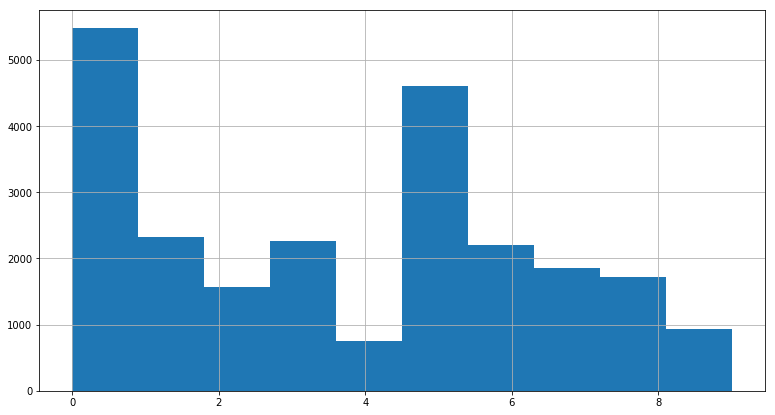

In [30]:
plt.figure(figsize=(13,7))
plt.hist(labelarr, bins=10)
plt.grid(True)
plt.show()